In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import random as random
import numpy as np
import matplotlib.animation as animation
from functions import *

In [2]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

In [3]:
frame_size = 280
digit_size = len(train_images[0])
n_digits = 5
duration = 100
max_jump = 2 #to define the angles of the direction
max_value = 254
speed = 2

253


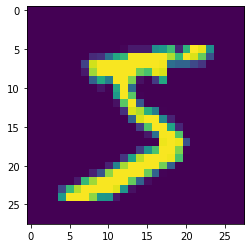

In [4]:
plt.imshow(train_images[0])
#pixel value between 0 and 254
print(train_images[0][7,11])

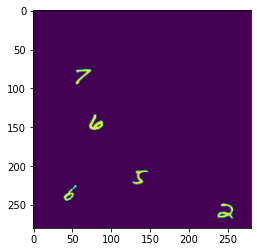

In [5]:
test_indexes = random.sample(range(len(train_images)), n_digits)
test_digits = train_images[test_indexes]
test_labels = train_labels[test_indexes]
#digits and labels are np arrays
#position of each digit, defined as top left corner
test_positions = [random.sample(range(frame_size-digit_size-1),2) for i in range(n_digits)]

test_frame = create_frame(frame_size, test_digits, test_positions)

plt.figure()
plt.imshow(test_frame)

In [7]:
frames = []

#Initial conditions

indexes = random.sample(range(len(train_images)), n_digits)
digits = train_images[indexes]
labels = train_labels[indexes]

positions = [random.sample(range(frame_size-digit_size-1),2) for i in range(n_digits)]

frame = create_frame(frame_size, digits, positions)
                      
#the frame with the digits is created
#initial directions of teach digit
#Choice of (2**max_jump) * 4 directions, for the movement to be smooth (not jump too much, choose a max_jump)
#Directions denoted by (dx, dy), dx and dy in [-max_jump, max_jump]
#But we don't want (0,0)
            

directions = [non_null_sample(max_jump, 2) for i in range(n_digits)]

       
for time in range(100):
    for k, digit in enumerate(digits):
        
        #update position based on the previously computed direction
        #depending on new position, update direction
        
        position = new_position(positions[k], directions[k], speed)
        positions[k] = position

        next_position = new_position(positions[k], directions[k], speed)
        
        if out_of_frame(next_position, frame_size, digit_size):
            #also returns True if the position is not out of frame but there is not enough room to put the digit there
            rebound_point = closest_frontier(position, frame_size, len(digit[0]))
            directions[k] = mirror_direction(directions[k], rebound_point, frame_size)
            
        if in_the_center(positions[k], frame_size, speed, digit_size, max_jump):
            #if far enough from the frontiers, probability 1/5 to slightly change direction
            
            random_nb = random.random()
            if random_nb < 0.05:
                directions[k][0] += 1
            elif random_nb >= 0.05 and random_nb < 0.1 :
                directions[k][0] -= 1
            if random_nb >= 0.1 and random_nb < 0.15:
                directions[k][1] += 1
            elif random_nb >= 0.15 and random_nb < 0.2 :
                directions[k][1] -= 1

    #create the frame with the new positions
    frame = create_frame(frame_size, digits, positions)
    frames.append(frame)
    

MovieWriter ffmpeg unavailable; using Pillow instead.


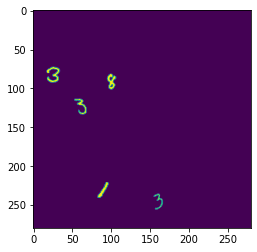

In [8]:
fig, ax  = plt.subplots()
ims = []
for i, image in enumerate(frames):
    im = ax.imshow((image), animated=True)
    if i == 0:
        ax.imshow(image)  # show an initial one first
    ims.append([im])

movie = animation.ArtistAnimation(fig, ims, interval=70, blit=True,
                                repeat_delay=1000)
movie.save('movies/5_medium.gif')